<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Import the packege

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, RepeatedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.base import BaseEstimator, TransformerMixin
import shap
from scipy.stats import wilcoxon, bootstrap
import logging
import warnings
from sklearn.impute import KNNImputer
import random
warnings.filterwarnings('ignore')

## logging fit

In [76]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

## seed

In [77]:
random.seed(42)
np.random.seed(42)

# read data set

In [78]:
df_xlsx = pd.read_excel('../data/DummyData.xlsx')

df_xlsx.to_csv('../data/DummyData.csv', index=False)
logger.info("change the xlsx form csv file done! ")

2025-06-05 08:51:26,598 - INFO - change the xlsx form csv file done! 


In [79]:
df = pd.read_csv('../data/DummyData.csv')
logger.info('read the csv file')

2025-06-05 08:51:26,749 - INFO - read the csv file


## Important columns
	sex: Gender (likely 1 for male and 2 for female, as all rows are 2).

	age: Age (all are 34 years old, so the data might be for a specific person or group).

	educational_status: Educational status (3.0, likely a code for a specific educational level, such as bachelor’s or higher).

	partner_status: Marital status (0.0, possibly indicating single).

	employment_status: Employment status (2.0, possibly indicating employed or unemployed, depending on the coding).

	weight, height, BMI: Weight (48 kg), height (164 cm), and Body Mass Index (17.85, indicating the person is underweight).

	treatment, EMI, nitrate, diuretic, psychotropic, angiotensin2_receptor_blocker: Variables related to treatment and medications (all are 0.0, suggesting the person is not taking any medication).

	week: Week (from 1 to 5, likely indicating data was collected weekly).

	steps: Number of steps per week (e.g., 72,765 steps in the first week).

	mvpa_mins: Minutes of Moderate to Vigorous Physical Activity per week (e.g., 2,105 minutes in the first week).

	perception: A variable likely related to perception or self-assessment (possibly of physical activity or health, ranging from 2 to 16).

	steps_goal, mvpa_mins_goal: Goals for steps and physical activity (e.g., step goal of 95,047 and activity goal of 2,509 minutes in the first week).

In [80]:
df_original = df.copy()
logger.info("copy data set done!")

2025-06-05 08:51:26,846 - INFO - copy data set done!


In [81]:
df.head()

,sex,age,educational_status,partner_status,employment_status,weight,height,BMI,treatment,EMI,...,nitrate,diuretic,psychotropic,angiotensin2_receptor_blocker,week,steps,mvpa_mins,perception,steps_goal,mvpa_mins_goal
0,2,34.0,3.0,0.0,2.0,48.0,164.0,17.85,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,72765,2105,16,95047.0,2509.0
1,2,34.0,3.0,0.0,2.0,48.0,164.0,17.85,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,53817,1557,2,74490.0,2063.0
2,2,34.0,3.0,0.0,2.0,48.0,164.0,17.85,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,58911,1704,4,70379.0,2163.0
3,2,34.0,3.0,0.0,2.0,48.0,164.0,17.85,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,85157,2463,8,125754.0,3164.0
4,2,34.0,3.0,0.0,2.0,48.0,164.0,17.85,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,51341,1485,12,68819.0,1886.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sex                            566 non-null    int64  
 1   age                            564 non-null    float64
 2   educational_status             561 non-null    float64
 3   partner_status                 561 non-null    float64
 4   employment_status              561 non-null    float64
 5   weight                         561 non-null    float64
 6   height                         561 non-null    float64
 7   BMI                            561 non-null    float64
 8   treatment                      561 non-null    float64
 9   EMI                            559 non-null    float64
 10  EAP                            559 non-null    float64
 11  EPTCA                          559 non-null    float64
 12  ECABG                          559 non-null    flo

In [83]:
df.describe()

,sex,age,educational_status,partner_status,employment_status,weight,height,BMI,treatment,EMI,...,nitrate,diuretic,psychotropic,angiotensin2_receptor_blocker,week,steps,mvpa_mins,perception,steps_goal,mvpa_mins_goal
count,566.000000,564.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,559.000000,...,561.000000,561.000000,561.000000,561.000000,561.000000,566.000000,566.000000,566.000000,531.000000,530.000000
mean,1.526502,48.753546,1.909091,0.520499,1.522282,77.306595,170.602496,26.537683,0.898396,0.157424,...,0.119430,0.160428,0.119430,0.155080,3.522282,42170.001767,1023.332155,5.328622,55226.549906,1260.035849
std,0.499739,14.723789,0.806628,0.500025,0.499949,15.792022,10.074398,4.984085,0.835815,0.364526,...,0.324583,0.367330,0.324583,0.362304,1.925381,22804.693283,624.349263,4.213101,30099.992532,773.527674
min,1.000000,25.000000,1.000000,0.000000,1.000000,46.000000,150.000000,17.170000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2145.000000,5.000000,0.000000,3089.000000,6.000000
25%,1.000000,36.000000,1.000000,0.000000,1.000000,64.000000,164.000000,22.940000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,23264.000000,604.250000,2.000000,30682.500000,716.250000
50%,2.000000,47.000000,2.000000,1.000000,2.000000,78.000000,170.000000,26.300000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,42602.000000,961.000000,5.000000,54642.000000,1153.500000
75%,2.000000,62.000000,3.000000,1.000000,2.000000,90.000000,178.000000,29.970000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,58830.250000,1400.750000,8.000000,77647.500000,1743.750000
max,2.000000,75.000000,3.000000,1.000000,2.000000,106.000000,190.000000,38.540000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,8.000000,102990.000000,2745.000000,20.000000,143791.000000,3617.000000


In [84]:
df.columns

Index(['sex', 'age', 'educational_status', 'partner_status',
       'employment_status', 'weight', 'height', 'BMI', 'treatment', 'EMI',
       'EAP', 'EPTCA', 'ECABG', 'ECVA_TIA', 'riskfactor_familyhistory',
       'riskfactor_DM', 'riskfactor_hypertension', 'riskfactor_dyslipidemia',
       'riskfactor_smoking', 'acetylsalicylic_acid',
       'cholesterol_lowering_med', 'ACE_inhibitor', 'calcium_blocker',
       'beta_blocker', 'thienopyridine', 'oral_anticoagulant', 'nitrate',
       'diuretic', 'psychotropic', 'angiotensin2_receptor_blocker', 'week',
       'steps', 'mvpa_mins', 'perception', 'steps_goal', 'mvpa_mins_goal'],
      dtype='object')

# clean data & missing values
	- Define numeric columns and categories

	- 1. Filling in missing numeric values ​​with the median

	- 2. Filling in missing values ​​in batches with fashion

	- 3. Filling complex columns with KNN

In [93]:
missing_values = df.isnull().sum()
print(f"the missing values in every columns {missing_values}")

the missing values in every columns sex                               0
age                               0
educational_status                0
partner_status                    0
employment_status                 0
weight                            0
height                            0
BMI                               0
treatment                         0
EMI                               7
EAP                               7
EPTCA                             7
ECABG                             7
ECVA_TIA                          7
riskfactor_familyhistory          0
riskfactor_DM                     0
riskfactor_hypertension           0
riskfactor_dyslipidemia           0
riskfactor_smoking                0
acetylsalicylic_acid              0
cholesterol_lowering_med          0
ACE_inhibitor                     0
calcium_blocker                   0
beta_blocker                      0
thienopyridine                    0
oral_anticoagulant                5
nitrate                     

In [94]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print(f"percentage missing for every columns {missing_percent}")
# if the percentage less than the .5 we can del that this is a optional

percentage missing for every columns sex                              0.000000
age                              0.000000
educational_status               0.000000
partner_status                   0.000000
employment_status                0.000000
weight                           0.000000
height                           0.000000
BMI                              0.000000
treatment                        0.000000
EMI                              1.236749
EAP                              1.236749
EPTCA                            1.236749
ECABG                            1.236749
ECVA_TIA                         1.236749
riskfactor_familyhistory         0.000000
riskfactor_DM                    0.000000
riskfactor_hypertension          0.000000
riskfactor_dyslipidemia          0.000000
riskfactor_smoking               0.000000
acetylsalicylic_acid             0.000000
cholesterol_lowering_med         0.000000
ACE_inhibitor                    0.000000
calcium_blocker                  0.0000

# Define numeric columns and categories

In [95]:
numeric_columns = ['age', 'weight', 'height', 'BMI', 'steps', 'mvpa_mins']
categorical_columns = ['educational_status', 'partner_status', 'employment_status', 
                      'treatment', 'riskfactor_familyhistory', 'riskfactor_DM', 
                      'riskfactor_hypertension', 'riskfactor_dyslipidemia', 
                      'riskfactor_smoking', 'acetylsalicylic_acid', 
                      'cholesterol_lowering_med', 'ACE_inhibitor', 
                      'calcium_blocker', 'beta_blocker', 'thienopyridine', 
                      'nitrate', 'diuretic', 'psychotropic', 
                      'angiotensin2_receptor_blocker']

# 1:

In [96]:
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

# 2:

In [97]:
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# 3: Filling steps_goal and mvpa_mins_goal with KNN

In [99]:
imputer = KNNImputer(n_neighbors=5)
df[['steps_goal', 'mvpa_mins_goal', 'EMI', 'EAP', 'EPTCA', 'ECABG', 'ECVA_TIA']] = pd.DataFrame(
    imputer.fit_transform(df[['steps_goal', 'mvpa_mins_goal', 'EMI', 'EAP', 'EPTCA', 'ECABG', 'ECVA_TIA']]),
    columns=['steps_goal', 'mvpa_mins_goal', 'EMI', 'EAP', 'EPTCA', 'ECABG', 'ECVA_TIA']
)

In [119]:
result = df.isnull().sum()[:11]
print(f"This is a result of data {result}")
logger.info("fill out the nan data OK!")

2025-06-05 09:10:20,918 - INFO - fill out the nan data OK!


This is a result of data sex                   0
age                   0
educational_status    0
partner_status        0
employment_status     0
weight                0
height                0
BMI                   0
treatment             0
EMI                   0
EAP                   0
dtype: int64


In [114]:
df.to_csv('../data/dataset_cleaned.csv', index=False)
logger.info("convert the csv file clean data")

2025-06-05 09:09:12,603 - INFO - convert the csv file clean data


In [115]:
df_clean = pd.read_csv('../data/dataset_cleaned.csv')
logger.info("read csv file clen data")

2025-06-05 09:09:13,916 - INFO - read csv file clen data


In [118]:
df_clean.isnull().sum()[:11]
logger.info('see and check data set')

2025-06-05 09:10:10,521 - INFO - see and check data set


## Outliers manager

In [127]:
for col in numeric_columns + ['steps_goal', 'mvpa_mins_goal']:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)

# Meaning of Variance:

	Age: A variance of 216 means a standard deviation of approximately √216 ≈ 14.7 years, which is reasonable for a medical dataset (e.g., individuals aged 20 to 60).
	Weight: A variance of 247 means a standard deviation of ≈15.7 kg, indicating that the weight of individuals in the dataset is quite varied.
	Height: A variance of 100 means a standard deviation of ≈10 cm, which is reasonable for height.
	BMI: A variance of 24.6 means a standard deviation of ≈5, which, for BMI (typically ranging from 15 to 40), indicates moderate variability.
	Steps and steps_goal: Very high variances (520 million and 868 million) show that the number of steps varies greatly among individuals, which is typical in physical activity data (e.g., one person might take 10,000 steps, another 100,000).
	mvpa_mins and mvpa_mins_goal: Similarly, high variances (387,000 and 568,000) indicate significant variation in minutes of physical activity.

In [131]:
variances = df_clean[numeric_columns + ['steps_goal', 'mvpa_mins_goal']].var()
print(f"show the var {variances}")

show the var age               2.160334e+02
weight            2.471852e+02
height            1.005985e+02
BMI               2.462177e+01
steps             5.200540e+08
mvpa_mins         3.873963e+05
steps_goal        8.680707e+08
mvpa_mins_goal    5.682327e+05
dtype: float64


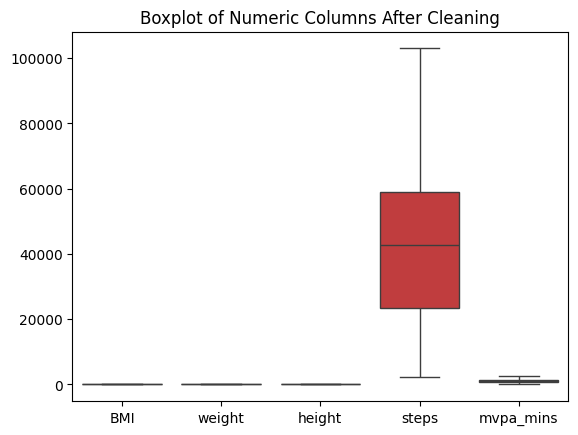

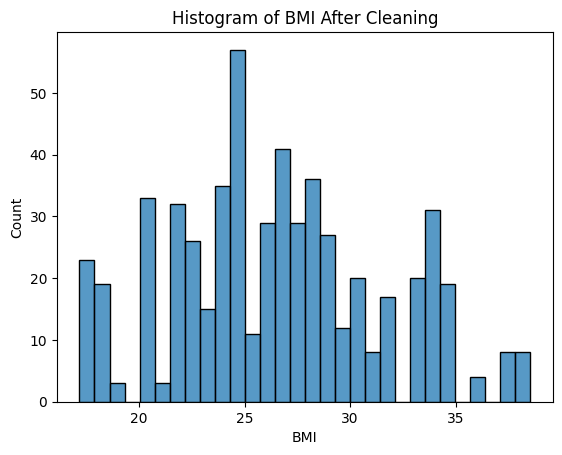

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot   
sns.boxplot(data=df_clean[['BMI', 'weight', 'height', 'steps', 'mvpa_mins']])
plt.title('Boxplot of Numeric Columns After Cleaning')
plt.show()

# BMI
sns.histplot(df_clean['BMI'], bins=30)
plt.title('Histogram of BMI After Cleaning')
plt.show()

2025-06-05 09:29:57,432 - INFO - Kept 36 columns with non-zero variance


2025-06-05 09:30:00,270 - INFO - Saved correlation matrix


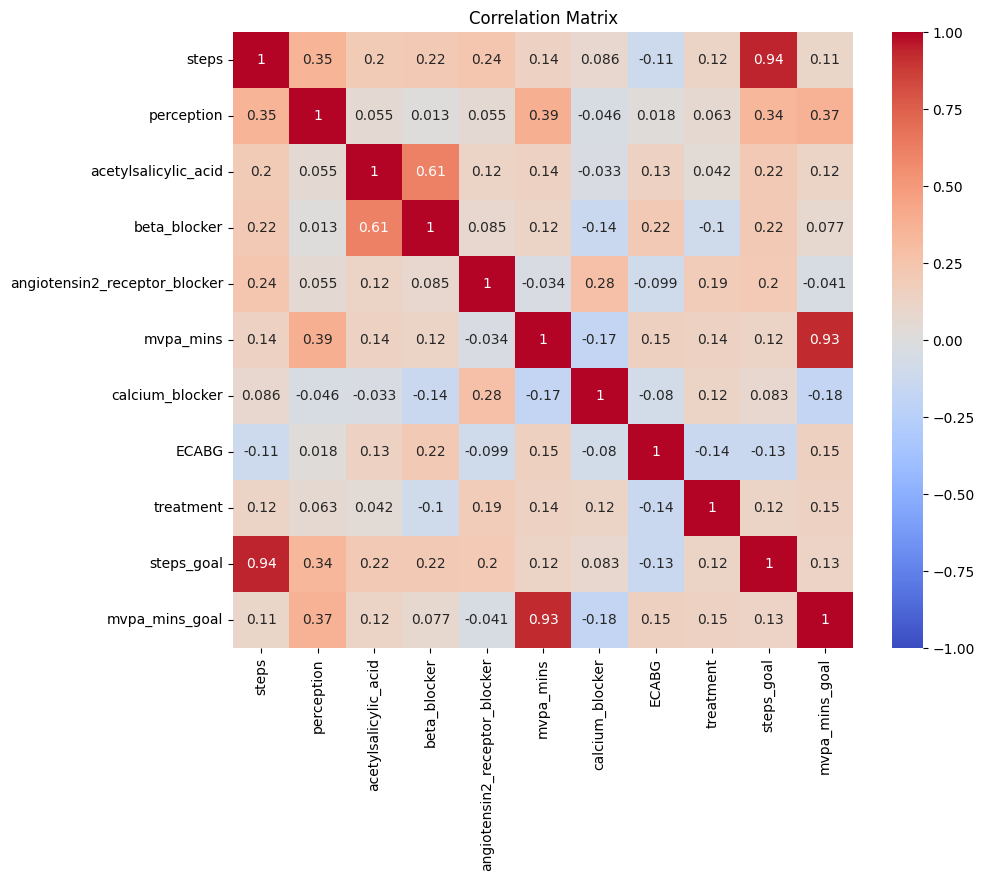

In [134]:
def analyze_correlations(df, target_columns=['steps_goal', 'mvpa_mins_goal']):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import logging

    logger = logging.getLogger()
    variance = df.var(numeric_only=True)
    non_zero_variance_cols = variance[variance > 0].index
    df = df[non_zero_variance_cols]
    logger.info(f"Kept {len(non_zero_variance_cols)} columns with non-zero variance")

    correlation_matrix = df.corr()
    top_features = []
    for target in target_columns:
        corr = correlation_matrix[target].abs().sort_values(ascending=False)[1:6]
        top_features.extend(corr.index)
    top_features = list(pd.Series(top_features).unique())[:10]
    selected_columns = top_features + target_columns
    corr_subset = correlation_matrix.loc[selected_columns, selected_columns]

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_subset, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Matrix')
    plt.savefig('correlation_matrix.png')
    logger.info("Saved correlation matrix")
    plt.show()

    return df, top_features

data_clean, top_features = analyze_correlations(df_clean)